# Transfer Learning - VGG19

VGG19 is a convolutional neural network architecture named after the Visual Geometry Group from Oxford, who developed it.

VGG19 is a variant of VGG model which in short consists of 19 layers (16 convolution layers, 3 Fully connected layer, 5 MaxPool layers and 1 SoftMax layer). There are other variants of VGG like VGG11, VGG16 and others. VGG19 has 19.6 billion FLOPs.

# Architecture

A fixed size of (224 * 224) RGB image was given as input to this network which means that the matrix was of shape (224,224,3).

The only preprocessing that was done is that they subtracted the mean RGB value from each pixel, computed over the whole training set.

Used kernels of (3 * 3) size with a stride size of 1 pixel, this enabled them to cover the whole notion of the image.

spatial padding was used to preserve the spatial resolution of the image.

max pooling was performed over a 2 * 2 pixel windows with sride 2.

this was followed by Rectified linear unit(ReLu) to introduce non-linearity to make the model classify better and to improve computational time as the previous models used tanh or sigmoid functions this proved much better than those.

implemented three fully connected layers from which first two were of size 4096 and after that a layer with 1000 channels for 1000-way ILSVRC classification and the final layer is a softmax function.

<img src='picture2.png'/>

# Importing the  Model

In [4]:
from keras.applications.vgg19 import VGG19
vgg19=VGG19()

Using TensorFlow backend.


In [5]:
print(vgg19.summary())

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
from keras.preprocessing.image import load_img
image=load_img('C:/Users/sandeep/Desktop/INTERNSHIP/data/car.jpg',target_size=(224,224))

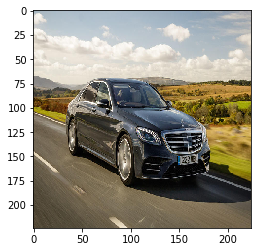

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(image)

In [9]:
from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
car_image = img_to_array(image)

In [10]:
# reshape data for the model
car_image = car_image.reshape((1, car_image.shape[0], car_image.shape[1], car_image.shape[2]))

In [11]:
from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
car_image = preprocess_input(car_image)

In [13]:
from keras.applications.vgg16 import decode_predictions
# predict the probability across all output classes
yhat = vgg19.predict(car_image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

racer (39.18%)


This Model correctly predicts the image as car racer with but least probability of 39%

In [15]:
image2 = load_img('C:/Users/sandeep/Desktop/INTERNSHIP/data/aeroplane.jpg', target_size=(224, 224))

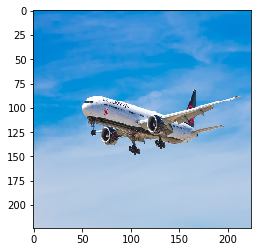

In [16]:
plt.imshow(image2)

In [18]:
# convert the image pixels to a numpy array
aeroplane_image = img_to_array(image2)
# reshape data for the model
aeroplane_image = aeroplane_image.reshape((1, aeroplane_image.shape[0], aeroplane_image.shape[1], aeroplane_image.shape[2]))
# prepare the image for the VGG model
aeroplane_image = preprocess_input(aeroplane_image)
# predict the probability across all output classes
yhat2 = vgg19.predict(aeroplane_image)
# convert the probabilities to class labels
label2 = decode_predictions(yhat2)
# retrieve the most likely result, e.g. highest probability
label2 = label2[0][0]
# print the classification
print('%s (%.2f%%)' % (label2[1], label2[2]*100))

airliner (78.09%)


This Model correctly predicts the image as aeroplane with 78% of probability

In [19]:
image3 = load_img('C:/Users/sandeep/Desktop/INTERNSHIP/data/lion.jpg', target_size=(224, 224))

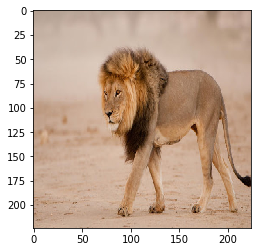

In [20]:
plt.imshow(image3)

In [21]:
# convert the image pixels to a numpy array
lion_image = img_to_array(image3)
# reshape data for the model
lion_image = lion_image.reshape((1, lion_image.shape[0], lion_image.shape[1], lion_image.shape[2]))
# prepare the image for the VGG model
lion_image = preprocess_input(lion_image)
# predict the probability across all output classes
yhat3 = vgg19.predict(lion_image)
# convert the probabilities to class labels
label3 = decode_predictions(yhat3)
# retrieve the most likely result, e.g. highest probability
label3 = label3[0][0]
# print the classification
print('%s (%.2f%%)' % (label3[1], label3[2]*100))

lion (100.00%)


This Model correctly predicts the image as lion with 100% of probability